In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pylab as plt
import folium
from folium import Choropleth
#from datetime import datetime

# Reading the Output CSV File

In [2]:
all_data = pd.read_csv('all_datasets.csv')
all_data.head()

,Unnamed: 0,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,area_code_x,Average_Age_int,Average_Age,area_code_y,Average_Household_Income,area_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg
0,0,Toronto,M1N,Multifamily Housing,0.36812575981152,0.1135377343418688,9.687520,74,M1N,3.965507,1946-1960,M1N,131075.252417,M1N,51147495.0,3580401.0
1,1,Scarborough,M1L,Multifamily Housing,0.40687583979168,0.3406132030256064,18.298649,39,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0
2,2,Toronto,M1L,Multifamily Housing,0.259625535867072,0.6812264060512128,33.368124,46,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0
3,3,Toronto,M1L,Multifamily Housing,0.38750079980159996,0.3406132030256064,17.222258,53,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0
4,4,Toronto,M1L,Multifamily Housing,0.38362579180358397,0.3406132030256064,19.375040,23,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0


In [3]:
district_df = pd.read_csv('postal_code_districts.csv')
district_df.head()

,Postal_Code,District
0,M3A,North York
1,M4A,North York
2,M5A,Downtown Toronto
3,M6A,North York
4,M7A,Downtown Toronto


In [4]:
all_data_filtered = pd.merge(all_data, district_df, on='Postal_Code', how='left')
all_data_filtered.head()

,Unnamed: 0,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,area_code_x,Average_Age_int,Average_Age,area_code_y,Average_Household_Income,area_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg,District
0,0,Toronto,M1N,Multifamily Housing,0.36812575981152,0.1135377343418688,9.687520,74,M1N,3.965507,1946-1960,M1N,131075.252417,M1N,51147495.0,3580401.0,Scarborough
1,1,Scarborough,M1L,Multifamily Housing,0.40687583979168,0.3406132030256064,18.298649,39,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,Scarborough
2,2,Toronto,M1L,Multifamily Housing,0.259625535867072,0.6812264060512128,33.368124,46,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,Scarborough
3,3,Toronto,M1L,Multifamily Housing,0.38750079980159996,0.3406132030256064,17.222258,53,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,Scarborough
4,4,Toronto,M1L,Multifamily Housing,0.38362579180358397,0.3406132030256064,19.375040,23,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,Scarborough


In [5]:
all_data_filtered = all_data_filtered[['City',
                              'Postal_Code',
                              'PrimPropTypCalc',
                              'WN_Sit_Elc_Int1',
                              'WN_Sit_Gas_Int1',
                              'GHG_Emiss_Int1',
                              'Ener_Star_Score',
                              'Average_Age_int',
                              'Average_Age',
                              'Average_Household_Income',
                              'Annual_electricity_generation_k',
                              'Annual_ghg_reduction_kg',  
                              'District']]

all_data_filtered['Ener_Star_Score'] = pd.to_numeric(all_data_filtered['Ener_Star_Score'], errors='coerce')
all_data_filtered['WN_Sit_Elc_Int1'] = pd.to_numeric(all_data_filtered['WN_Sit_Elc_Int1'], errors='coerce')
all_data_filtered['WN_Sit_Gas_Int1'] = pd.to_numeric(all_data_filtered['WN_Sit_Gas_Int1'], errors='coerce')

all_data_filtered.head()

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,Average_Age_int,Average_Age,Average_Household_Income,Annual_electricity_generation_k,Annual_ghg_reduction_kg,District
0,Toronto,M1N,Multifamily Housing,0.368126,0.113538,9.687520,74.0,3.965507,1946-1960,131075.252417,51147495.0,3580401.0,Scarborough
1,Scarborough,M1L,Multifamily Housing,0.406876,0.340613,18.298649,39.0,4.521639,1961-1975,97329.028602,101061619.0,7074310.0,Scarborough
2,Toronto,M1L,Multifamily Housing,0.259626,0.681226,33.368124,46.0,4.521639,1961-1975,97329.028602,101061619.0,7074310.0,Scarborough
3,Toronto,M1L,Multifamily Housing,0.387501,0.340613,17.222258,53.0,4.521639,1961-1975,97329.028602,101061619.0,7074310.0,Scarborough
4,Toronto,M1L,Multifamily Housing,0.383626,0.340613,19.375040,23.0,4.521639,1961-1975,97329.028602,101061619.0,7074310.0,Scarborough


In [6]:
all_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411 entries, 0 to 1410
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             1411 non-null   object 
 1   Postal_Code                      1411 non-null   object 
 2   PrimPropTypCalc                  1411 non-null   object 
 3   WN_Sit_Elc_Int1                  1360 non-null   float64
 4   WN_Sit_Gas_Int1                  1310 non-null   float64
 5   GHG_Emiss_Int1                   1411 non-null   float64
 6   Ener_Star_Score                  1113 non-null   float64
 7   Average_Age_int                  1409 non-null   float64
 8   Average_Age                      1409 non-null   object 
 9   Average_Household_Income         1411 non-null   float64
 10  Annual_electricity_generation_k  1410 non-null   float64
 11  Annual_ghg_reduction_kg          1410 non-null   float64
 12  District            

## Postal Code

<function matplotlib.pyplot.show(close=None, block=None)>

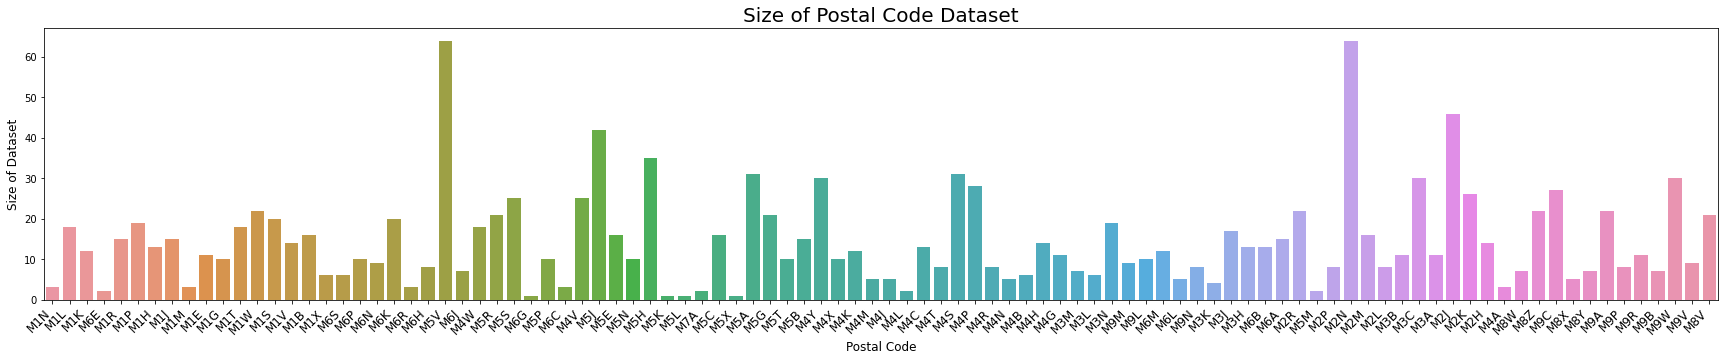

In [7]:
plt.figure(figsize = (30,5))
plt.title('Size of Postal Code Dataset', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.countplot(x='Postal_Code', data=all_data_filtered)

plt.xlabel('Postal Code', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Size of Dataset', fontsize=12)

plt.show

### Electrical Intensity Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

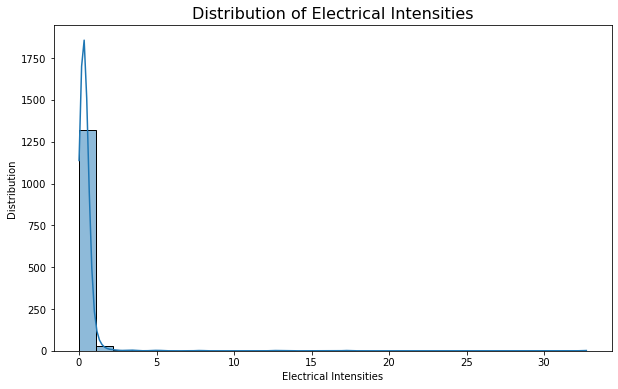

In [8]:
plt.figure(figsize = (10,6))
plt.title('Distribution of Electrical Intensities', fontsize = 16)

sns.histplot(data=all_data_filtered, x='WN_Sit_Elc_Int1', kde=True, bins=30) #exploring distrubtion of electrical intensities across dataset

plt.xlabel('Electrical Intensities')
plt.ylabel('Distribution')

plt.show

In [9]:
anomalies = all_data_filtered[all_data_filtered['WN_Sit_Elc_Int1'] > 5] #exploring the anomalies where intensity was greater than 5
anomalies

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,Average_Age_int,Average_Age,Average_Household_Income,Annual_electricity_generation_k,Annual_ghg_reduction_kg,District
83,toronto,M1J,Other - Lodging/Residential,17.298036,1.021840,189.444835,NaN,4.665366,1961-1975,93211.620682,66161089.0,4631323.0,Scarborough
411,Toronto,M5G,Office,5.208011,0.000000,158733.244292,1.0,2.413806,1916-1930,98464.970311,2539281.0,177750.0,Downtown Toronto
751,North York,M2N,Office,32.728318,0.340613,287.396427,1.0,4.605837,1961-1975,128963.829629,97879155.0,6851531.0,North York
999,TORONTO,M8Z,Manufacturing/Industrial Plant,7.804266,0.794764,99.027982,NaN,4.541596,1961-1975,114495.698677,163646773.0,11455286.0,Etobicoke
1367,Toronto,M1V,Manufacturing/Industrial Plant,12.679026,10.104858,607.084586,NaN,5.720074,1976-2003,95557.037908,169280956.0,11849692.0,Scarborough


<function matplotlib.pyplot.show(close=None, block=None)>

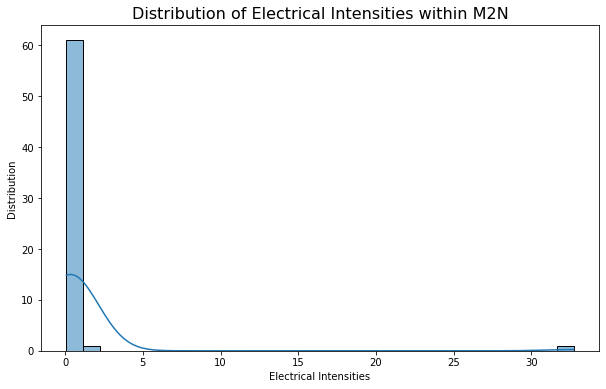

In [10]:
plt.figure(figsize = (10,6))
plt.title('Distribution of Electrical Intensities within M2N', fontsize = 16)

M2N = all_data_filtered[all_data_filtered['Postal_Code'] == 'M2N'] #Since M2N was the highest, explored other building intensities in that region
sns.histplot(data=M2N, x='WN_Sit_Elc_Int1', kde=True, bins=30)

plt.xlabel('Electrical Intensities')
plt.ylabel('Distribution')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

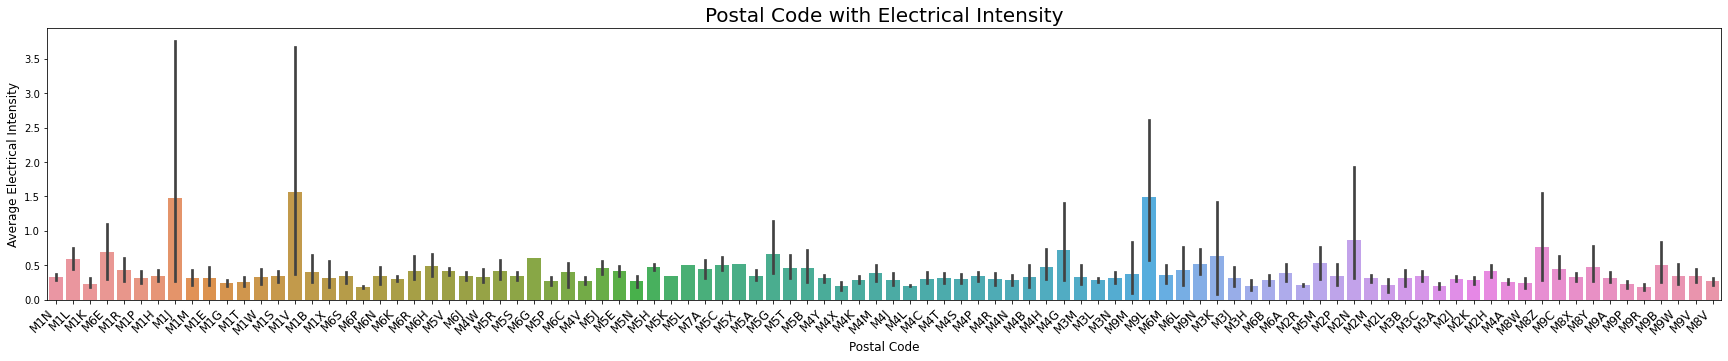

In [11]:
# Write your code here.
plt.figure(figsize = (30,5))
plt.title('Postal Code with Electrical Intensity', fontsize=20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='Postal_Code', y='WN_Sit_Elc_Int1', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Postal Code', fontsize = 12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Average Electrical Intensity', fontsize=12)

plt.show

## Gas Intensity Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

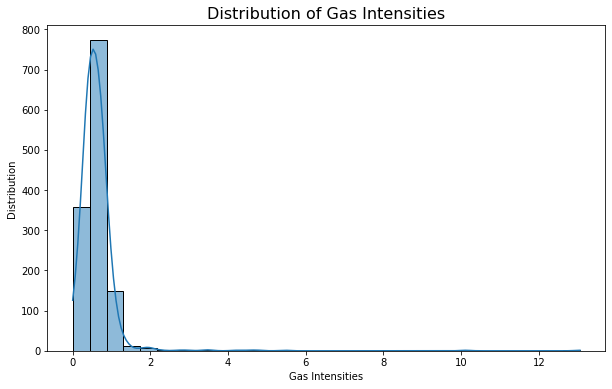

In [12]:
plt.figure(figsize = (10,6))
plt.title('Distribution of Gas Intensities', fontsize = 16)

sns.histplot(data=all_data_filtered, x='WN_Sit_Gas_Int1', kde=True, bins=30) #exploring distrubtion of electrical intensities across dataset

plt.xlabel('Gas Intensities')
plt.ylabel('Distribution')

plt.show

In [13]:
anomalies = all_data_filtered[all_data_filtered['WN_Sit_Gas_Int1'] > 4] #exploring the anomalies where intensity was greater than 5
anomalies

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,Average_Age_int,Average_Age,Average_Household_Income,Annual_electricity_generation_k,Annual_ghg_reduction_kg,District
413,Toronto,M5B,Retail Store,1.984004,4.200896,209.896267,NaN,3.049505,1931-1945,95497.214033,4392332.0,307458.0,Downtown Toronto
657,North York,M9L,Manufacturing/Industrial Plant,3.375132,13.056839,671.668053,NaN,5.108102,1961-1975,94899.652813,144732905.0,10131315.0,North York
658,North York,M9L,Manufacturing/Industrial Plant,3.103881,5.449811,297.083947,NaN,5.108102,1961-1975,94899.652813,144732905.0,10131315.0,North York
1081,Etobicoke,M9W,Entrepôt non réfrigéré,0.143375,4.768585,237.882435,1.0,5.014935,1961-1975,102159.949085,363969090.0,25477874.0,Etobicoke
1224,North York,M9L,Manufacturing/Industrial Plant,4.812760,4.541509,262.639431,NaN,5.108102,1961-1975,94899.652813,144732905.0,10131315.0,North York
1367,Toronto,M1V,Manufacturing/Industrial Plant,12.679026,10.104858,607.084586,NaN,5.720074,1976-2003,95557.037908,169280956.0,11849692.0,Scarborough


<function matplotlib.pyplot.show(close=None, block=None)>

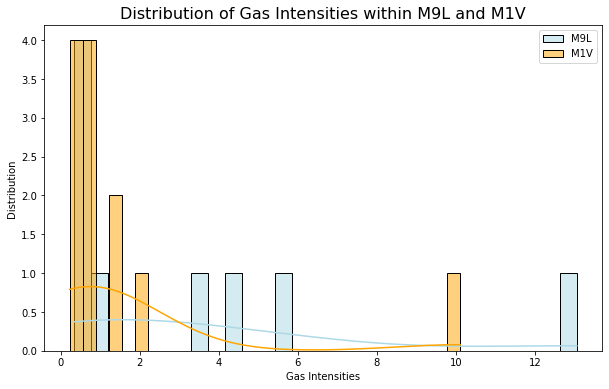

In [14]:
plt.figure(figsize = (10,6))
plt.title('Distribution of Gas Intensities within M9L and M1V', fontsize = 16)

M9L = all_data_filtered[all_data_filtered['Postal_Code'] == 'M9L'] #Since M9L was the highest, explored other building intensities in that region
M1V = all_data_filtered[all_data_filtered['Postal_Code'] == 'M1V'] #Since M1V was also high, explored other building intensities in that region

sns.histplot(data=M9L, x='WN_Sit_Gas_Int1', label='M9L', kde=True, bins=30, color='lightblue')
sns.histplot(data=M1V, x='WN_Sit_Gas_Int1', label='M1V', kde=True, bins=30, color='orange')

plt.xlabel('Gas Intensities')
plt.ylabel('Distribution')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

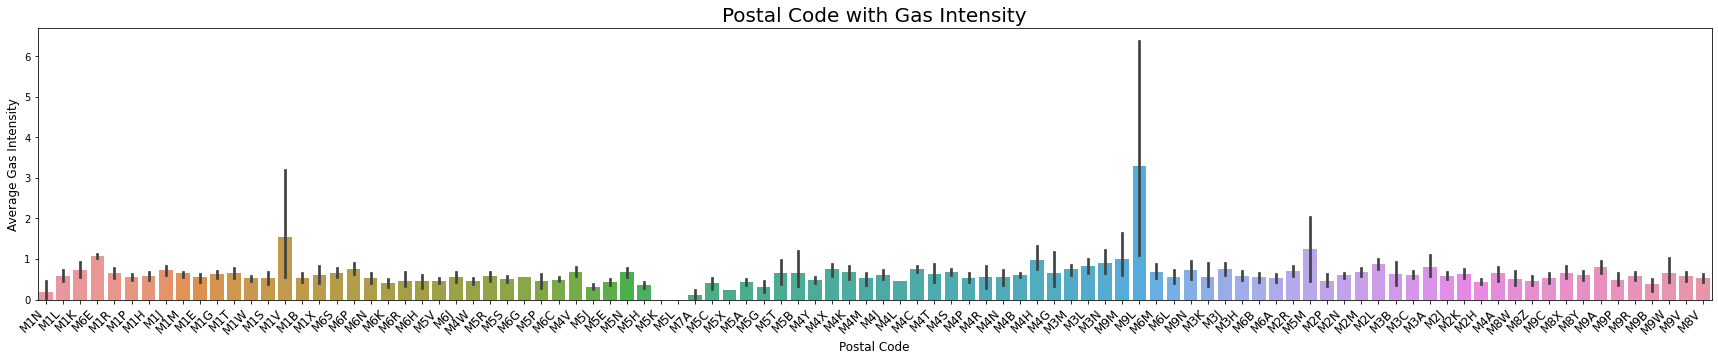

In [15]:
# Write your code here.
plt.figure(figsize = (30,5))
plt.title('Postal Code with Gas Intensity', fontsize=20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='Postal_Code', y='WN_Sit_Gas_Int1', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Postal Code', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Average Gas Intensity', fontsize=12)

plt.show

### GHG Intensity Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

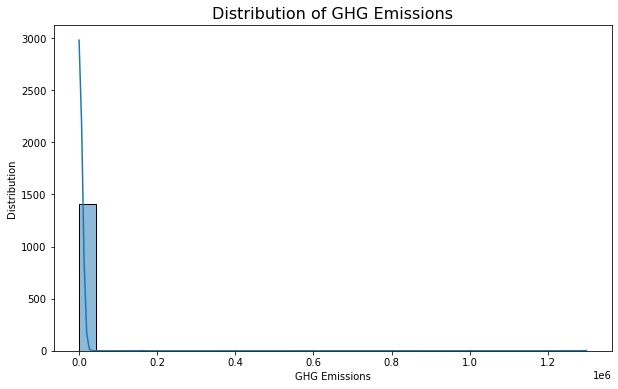

In [16]:
plt.figure(figsize = (10,6))
plt.title('Distribution of GHG Emissions', fontsize = 16)

sns.histplot(data=all_data_filtered, x='GHG_Emiss_Int1', kde=True, bins=30) #exploring distrubtion of electrical intensities across dataset

plt.xlabel('GHG Emissions')
plt.ylabel('Distribution')

plt.show

In [17]:
anomalies = all_data_filtered[all_data_filtered['GHG_Emiss_Int1'] > 0.1*10**6] #exploring the anomalies where intensity was greater than 5
anomalies

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,Average_Age_int,Average_Age,Average_Household_Income,Annual_electricity_generation_k,Annual_ghg_reduction_kg,District
411,Toronto,M5G,Office,5.208011,0.0,1.587332e+05,1.0,2.413806,1916-1930,98464.970311,2539281.0,177750.0,Downtown Toronto
680,Toronto,M3K,Other - Mall,NaN,NaN,1.298720e+06,NaN,4.155372,1946-1960,98230.300306,41136340.0,2879589.0,North York


<function matplotlib.pyplot.show(close=None, block=None)>

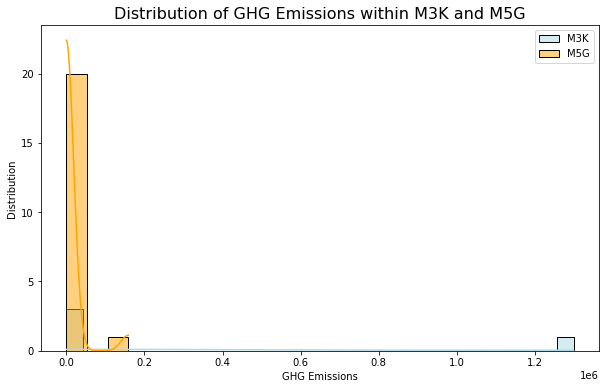

In [18]:
plt.figure(figsize = (10,6))
plt.title('Distribution of GHG Emissions within M3K and M5G', fontsize = 16)

M3K = all_data_filtered[all_data_filtered['Postal_Code'] == 'M3K']
M5G = all_data_filtered[all_data_filtered['Postal_Code'] == 'M5G']

sns.histplot(data=M3K, x='GHG_Emiss_Int1', label='M3K', kde=True, bins=30, color='lightblue')
sns.histplot(data=M5G, x='GHG_Emiss_Int1', label='M5G', kde=True, bins=3, color='orange')


plt.xlabel('GHG Emissions')
plt.ylabel('Distribution')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

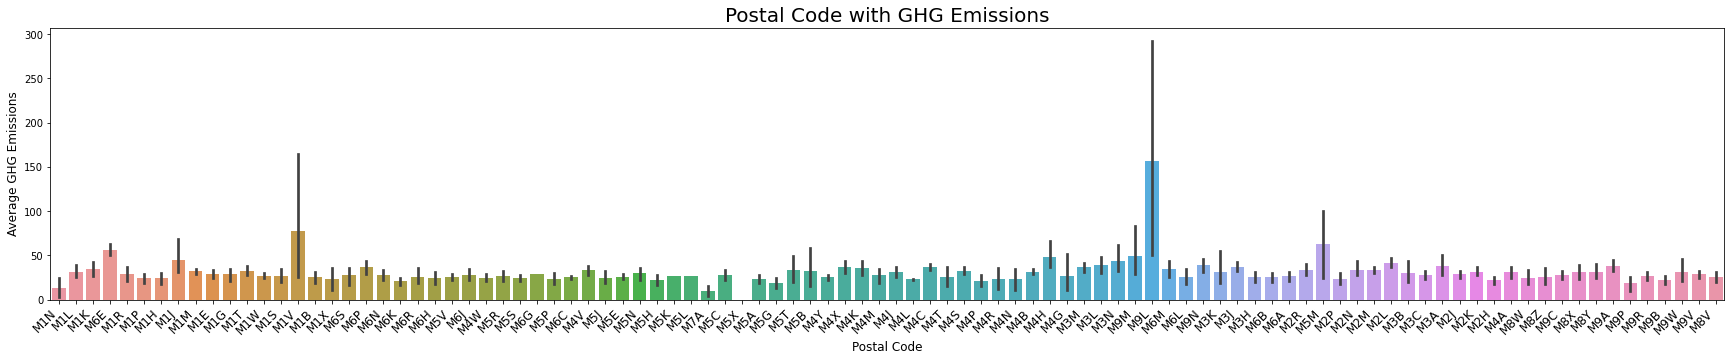

In [19]:
# Write your code here.
plt.figure(figsize = (30,5))
plt.title('Postal Code with GHG Emissions', fontsize=20) 

drop_411_680 = all_data_filtered.drop(index=[411,680]) #dropping for better visualization

ax = sns.barplot(x='Postal_Code', y='GHG_Emiss_Int1', data=drop_411_680, estimator=np.mean)

plt.xlabel('Postal Code', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Average GHG Emissions', fontsize=12)

plt.show

/Users/steffanylung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

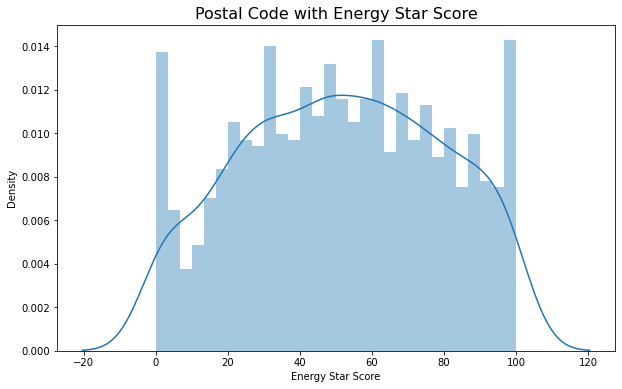

In [20]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Postal Code with Energy Star Score', fontsize = 16) #title is added to canvas so do it here, not the lineplot itself

ax = sns.distplot(x=all_data_filtered['Ener_Star_Score'], bins=30)

plt.xlabel('Energy Star Score')
plt.ylabel('Density')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

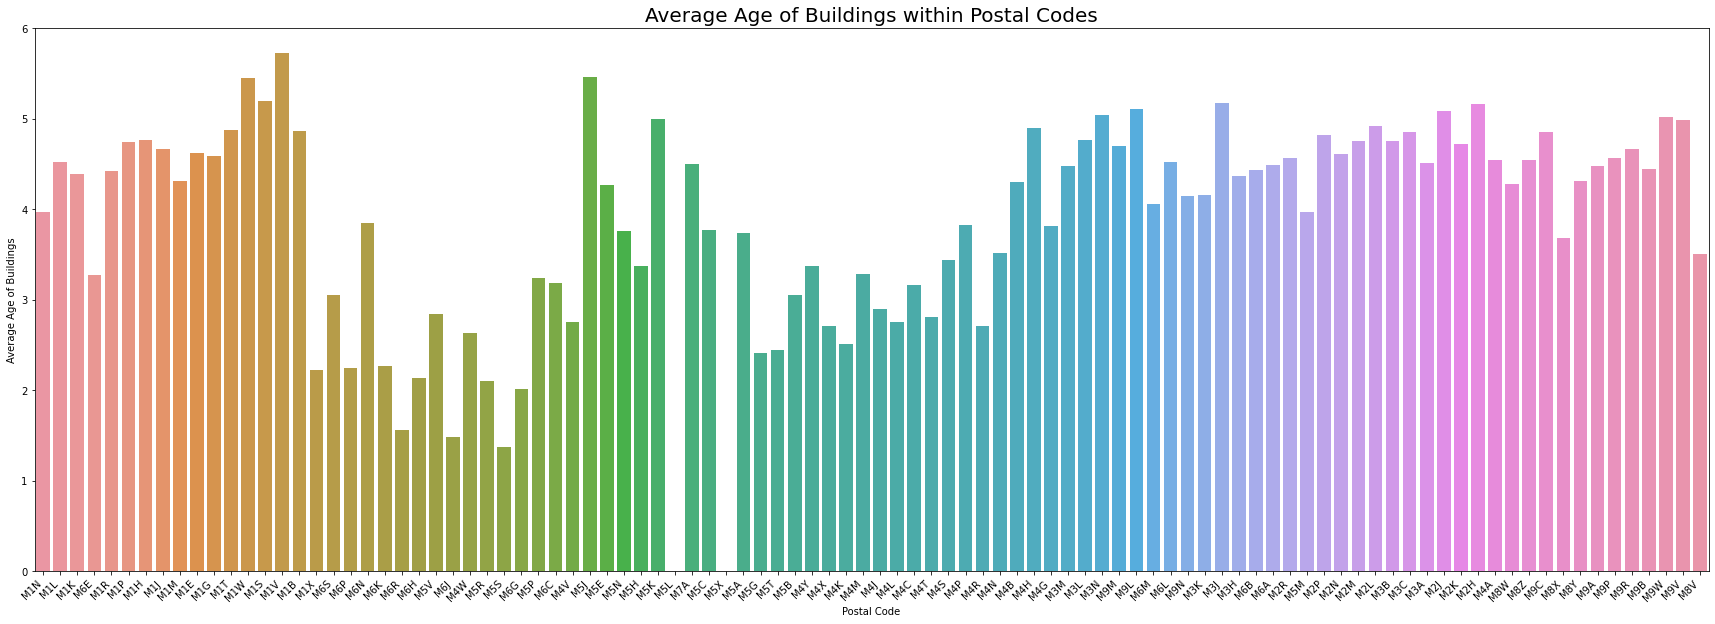

In [21]:
# Write your code here.
plt.figure(figsize = (30,10))
plt.title('Average Age of Buildings within Postal Codes', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='Postal_Code', y='Average_Age_int', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Postal Code')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Age of Buildings')

plt.show

## Land Use

<function matplotlib.pyplot.show(close=None, block=None)>

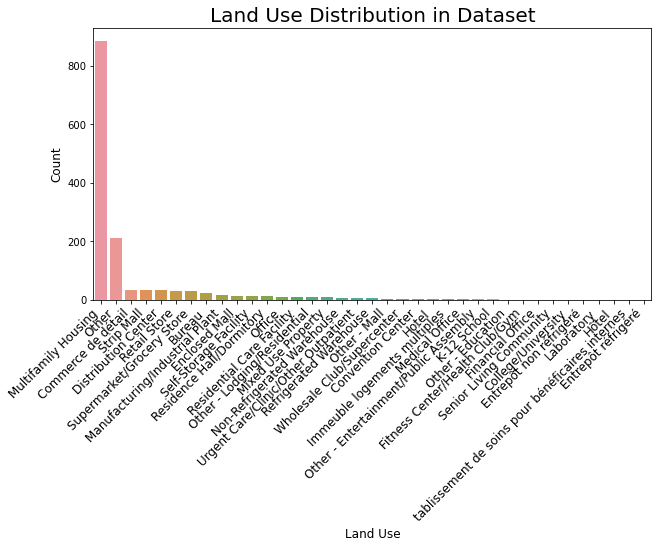

In [22]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use Distribution in Dataset', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x=all_data_filtered['PrimPropTypCalc'].unique(), y=all_data_filtered['PrimPropTypCalc'].value_counts())

plt.xlabel('Land Use', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

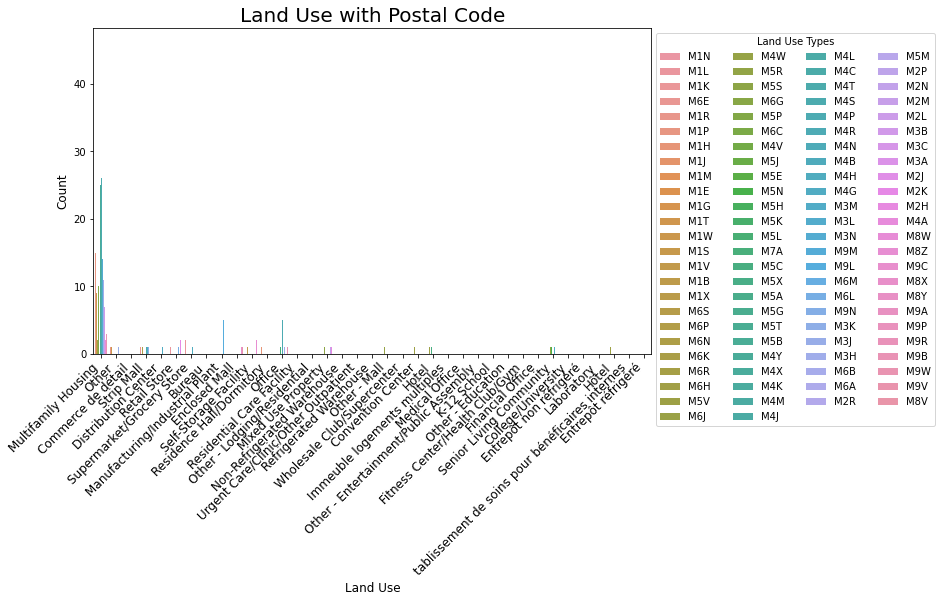

In [23]:
plt.figure(figsize=(10, 6))
plt.title('Land Use with Postal Code', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

sns.countplot(x='PrimPropTypCalc', hue='Postal_Code', data=all_data_filtered)

plt.xlabel('Land Use', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Land Use Types', ncol=4)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

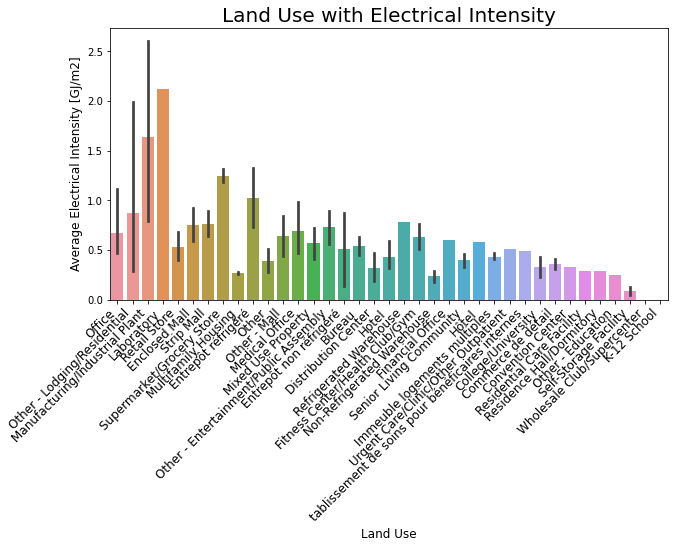

In [24]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use with Electrical Intensity', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

sorted_data = all_data_filtered.sort_values(by='WN_Sit_Elc_Int1', ascending=False)

ax = sns.barplot(x='PrimPropTypCalc', y='WN_Sit_Elc_Int1', data=sorted_data, estimator=np.mean)

plt.xlabel('Land Use', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Average Electrical Intensity [GJ/m2]', fontsize=12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

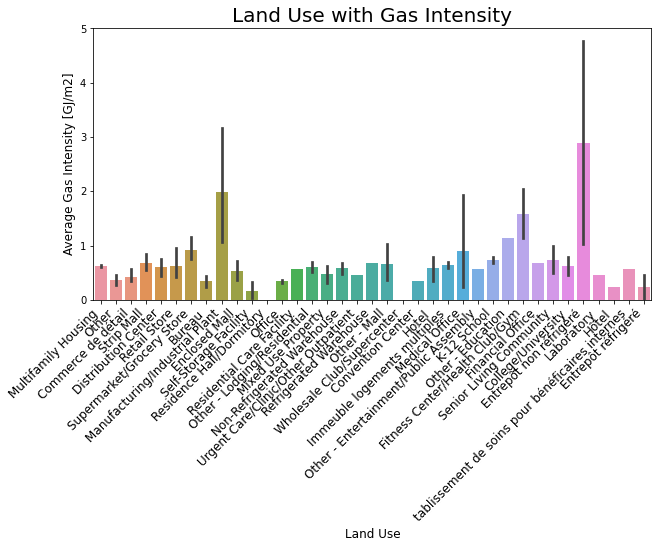

In [25]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use with Gas Intensity', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='PrimPropTypCalc', y='WN_Sit_Gas_Int1', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Land Use', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Average Gas Intensity [GJ/m2]', fontsize=12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

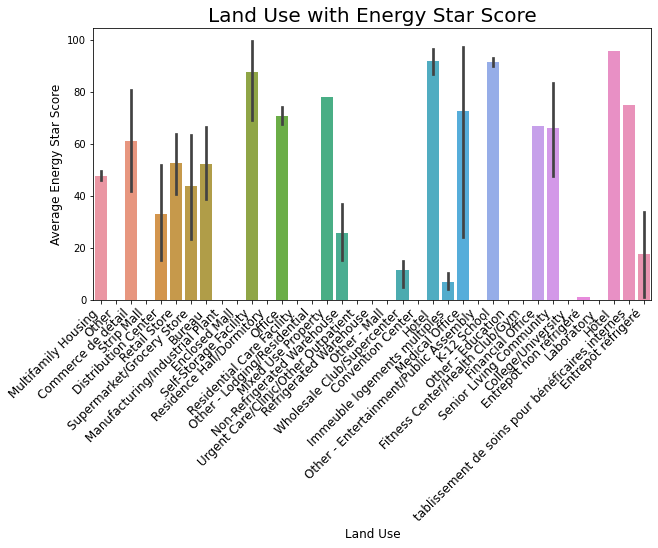

In [26]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use with Energy Star Score', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='PrimPropTypCalc', y='Ener_Star_Score', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Land Use', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Average Energy Star Score', fontsize=12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

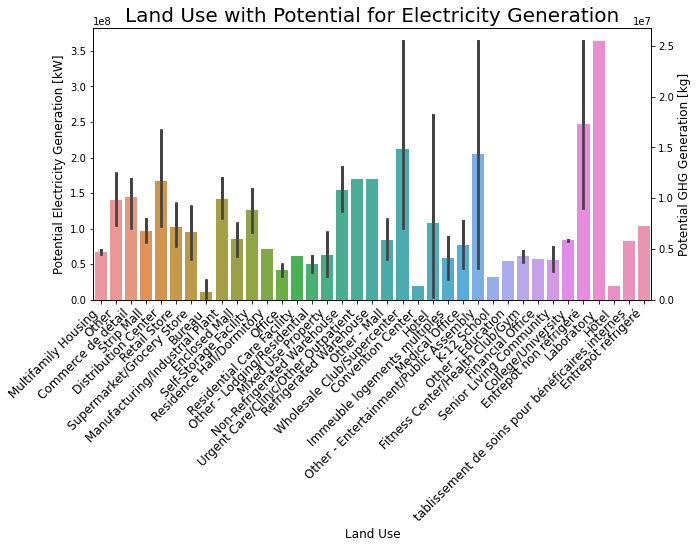

In [27]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use with Potential for Electricity Generation', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax1 = sns.barplot(x='PrimPropTypCalc', y='Annual_electricity_generation_k', data=all_data_filtered, estimator=np.mean)
ax2 = ax1.twinx()
ax2 = sns.barplot(x='PrimPropTypCalc', y='Annual_ghg_reduction_kg', data=all_data_filtered, estimator=np.mean)

ax1.set_ylabel('Potential Electricity Generation [kW]', fontsize=12)
ax2.set_ylabel('Potential GHG Generation [kg]', fontsize=12)

ax1.set_xlabel('Land Use', fontsize = 12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show

## Age of Buildings

<function matplotlib.pyplot.show(close=None, block=None)>

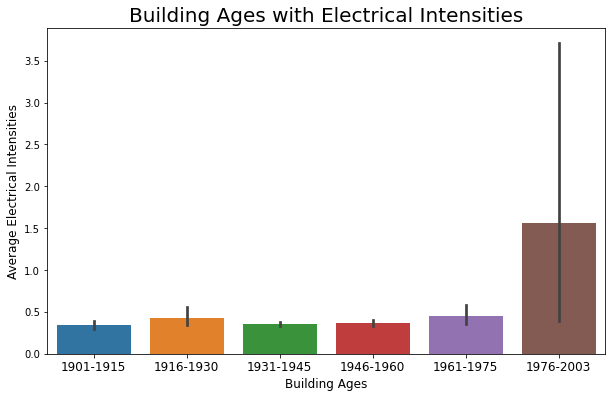

In [28]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with Electrical Intensities', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

desired_order = ['1901-1915', '1916-1930', '1931-1945', '1946-1960', '1961-1975', '1976-2003']

ax = sns.barplot(x='Average_Age', y='WN_Sit_Elc_Int1', data=all_data_filtered, estimator=np.mean, order=desired_order)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Average Electrical Intensities', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

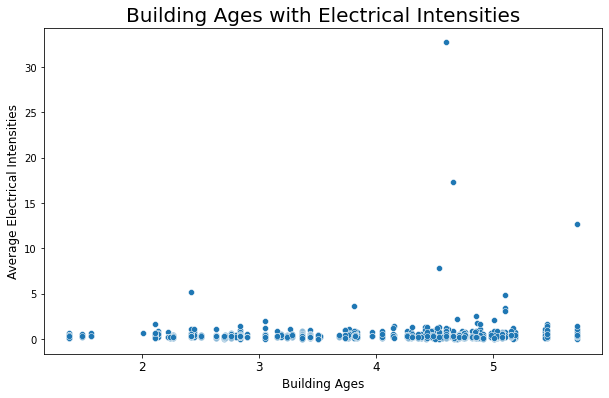

In [29]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with Electrical Intensities', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='Average_Age_int', y='WN_Sit_Elc_Int1', data=all_data_filtered)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Average Electrical Intensities', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

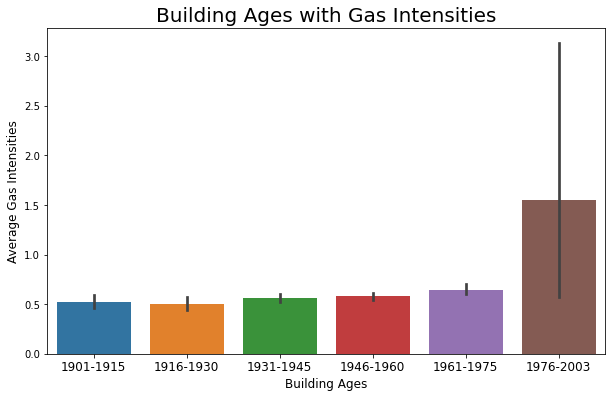

In [30]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with Gas Intensities', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

desired_order = ['1901-1915', '1916-1930', '1931-1945', '1946-1960', '1961-1975', '1976-2003']

ax = sns.barplot(x='Average_Age', y='WN_Sit_Gas_Int1', data=all_data_filtered, estimator=np.mean, order=desired_order)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Average Gas Intensities', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

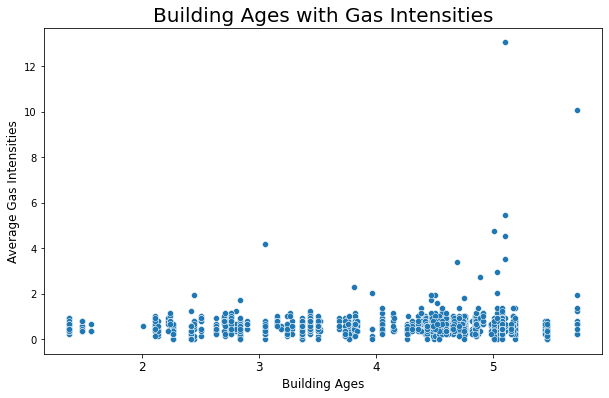

In [31]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with Gas Intensities', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='Average_Age_int', y='WN_Sit_Gas_Int1', data=all_data_filtered)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Average Gas Intensities', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

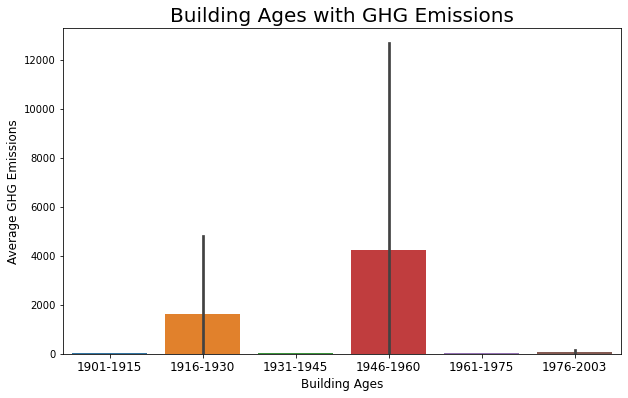

In [32]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with GHG Emissions', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

desired_order = ['1901-1915', '1916-1930', '1931-1945', '1946-1960', '1961-1975', '1976-2003']

ax = sns.barplot(x='Average_Age', y='GHG_Emiss_Int1', data=all_data_filtered, estimator=np.mean, order=desired_order)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Average GHG Emissions', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

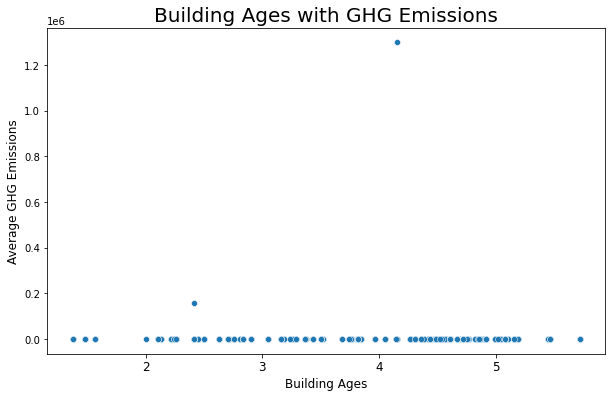

In [33]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with GHG Emissions', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='Average_Age_int', y='GHG_Emiss_Int1', data=all_data_filtered)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Average GHG Emissions', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

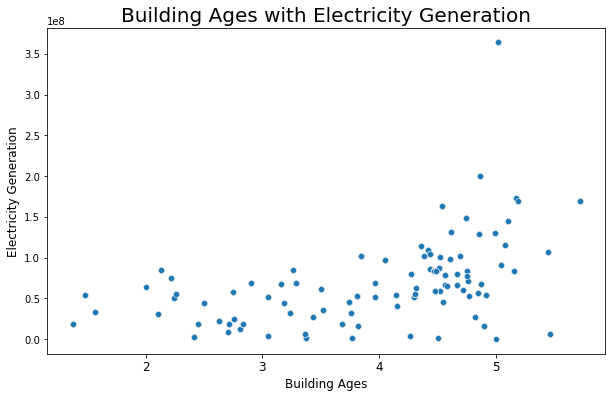

In [34]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with Electricity Generation', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='Average_Age_int', y='Annual_electricity_generation_k', data=all_data_filtered)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Electricity Generation', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

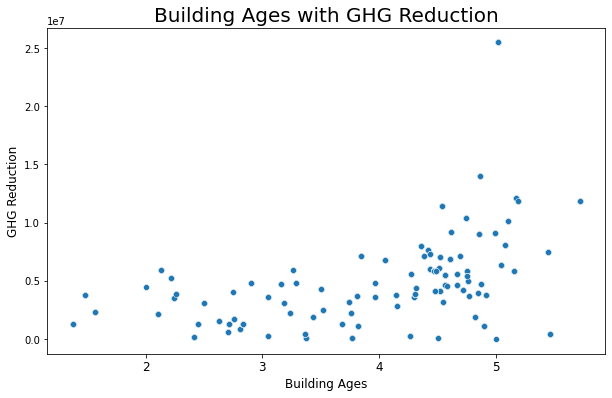

In [35]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with GHG Reduction', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='Average_Age_int', y='Annual_ghg_reduction_kg', data=all_data_filtered)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('GHG Reduction', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

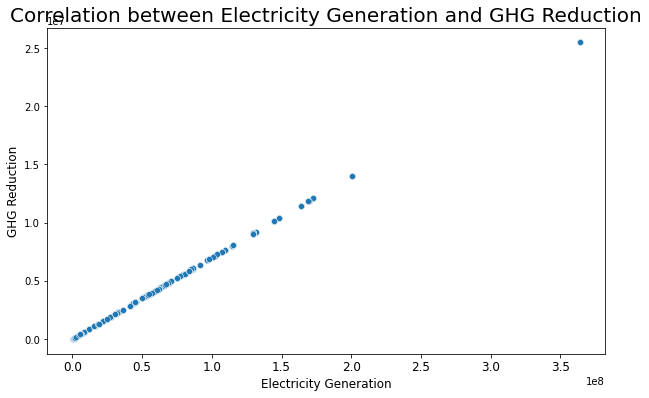

In [36]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Correlation between Electricity Generation and GHG Reduction', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='Annual_electricity_generation_k', y='Annual_ghg_reduction_kg', data=all_data_filtered)

plt.xlabel('Electricity Generation', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('GHG Reduction', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

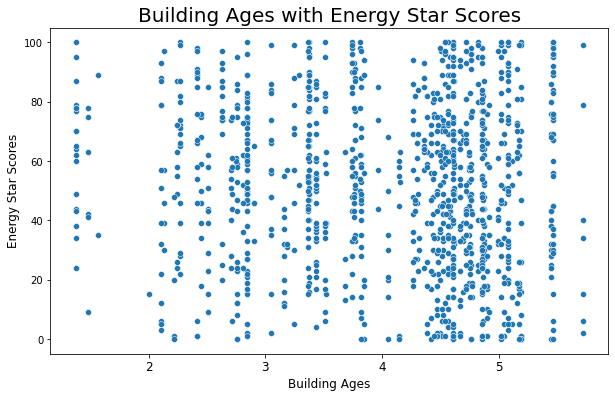

In [37]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with Energy Star Scores', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='Average_Age_int', y='Ener_Star_Score', data=all_data_filtered)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Energy Star Scores', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

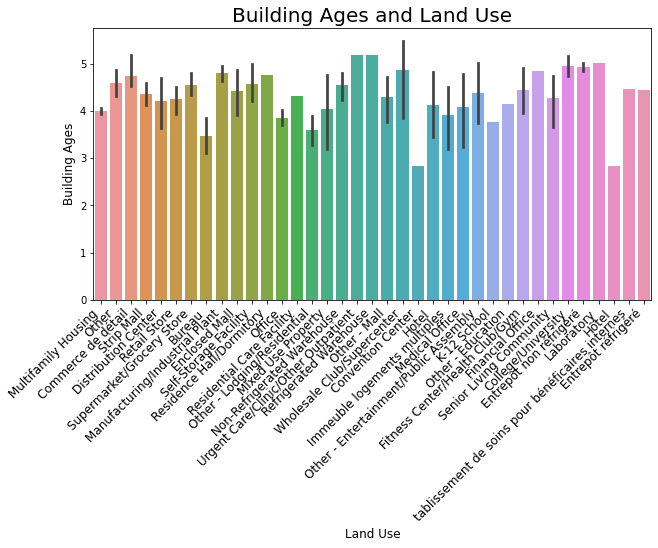

In [38]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Building Ages and Land Use', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='PrimPropTypCalc', y='Average_Age_int', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Land Use', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Building Ages', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

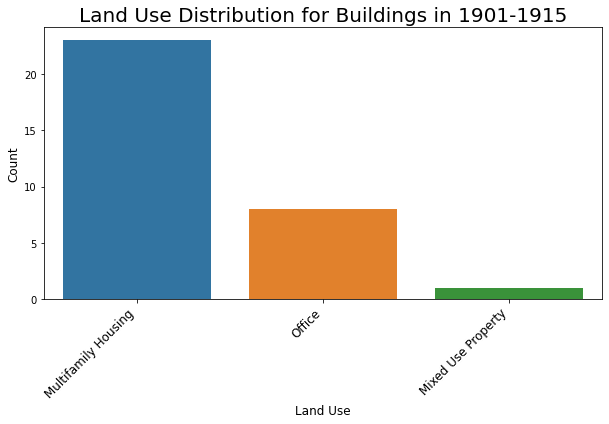

In [39]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use Distribution for Buildings in 1901-1915', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

d_1901_1915 = all_data_filtered[all_data_filtered['Average_Age']=='1901-1915']

ax = sns.countplot(x='PrimPropTypCalc', data=d_1901_1915)

plt.xlabel('Land Use', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Count', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

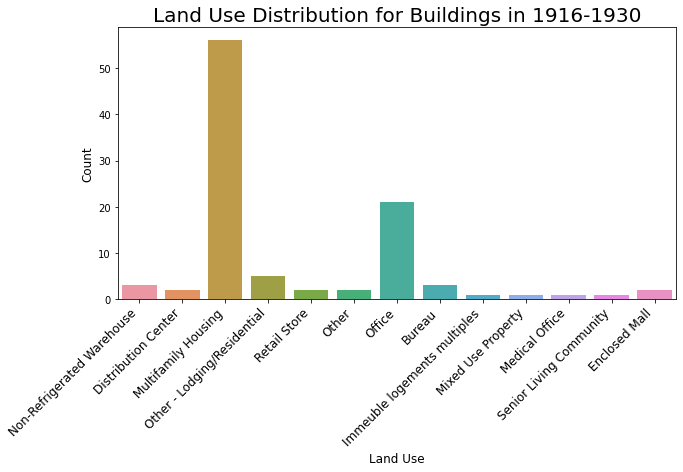

In [40]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use Distribution for Buildings in 1916-1930', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

d_1916_1930 = all_data_filtered[all_data_filtered['Average_Age']=='1916-1930']

ax = sns.countplot(x='PrimPropTypCalc', data=d_1916_1930)

plt.xlabel('Land Use', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Count', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

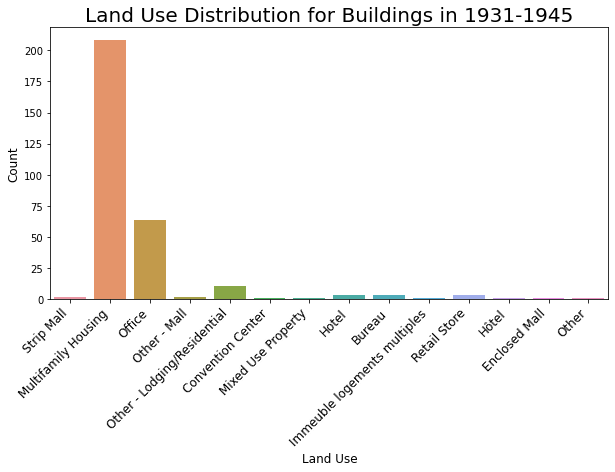

In [41]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use Distribution for Buildings in 1931-1945', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

d_1931_1945 = all_data_filtered[all_data_filtered['Average_Age']=='1931-1945']

ax = sns.countplot(x='PrimPropTypCalc', data=d_1931_1945)

plt.xlabel('Land Use', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Count', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

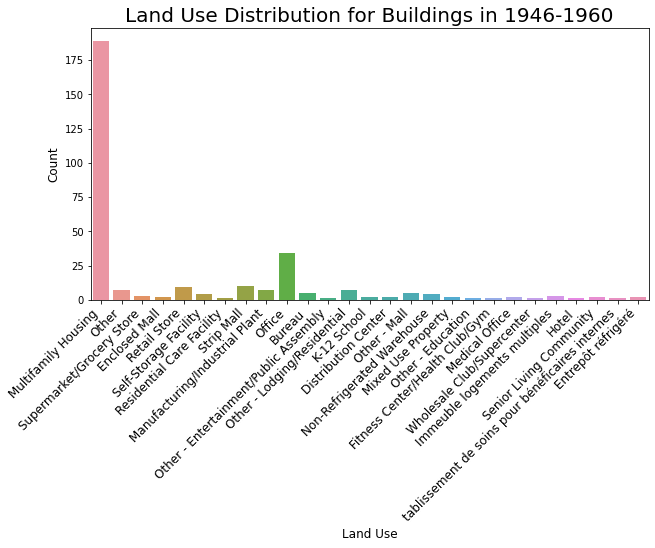

In [42]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use Distribution for Buildings in 1946-1960', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

d_1946_1960 = all_data_filtered[all_data_filtered['Average_Age']=='1946-1960']

ax = sns.countplot(x='PrimPropTypCalc', data=d_1946_1960)

plt.xlabel('Land Use', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Count', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

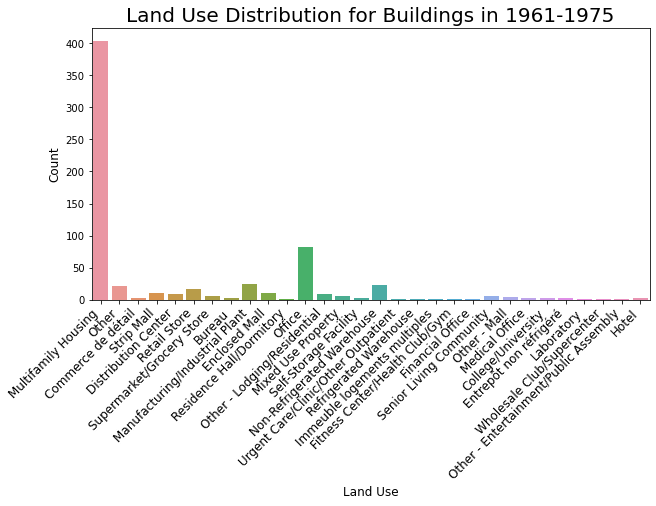

In [43]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use Distribution for Buildings in 1961-1975', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

d_1961_1975 = all_data_filtered[all_data_filtered['Average_Age']=='1961-1975']

ax = sns.countplot(x='PrimPropTypCalc', data=d_1961_1975)

plt.xlabel('Land Use', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Count', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

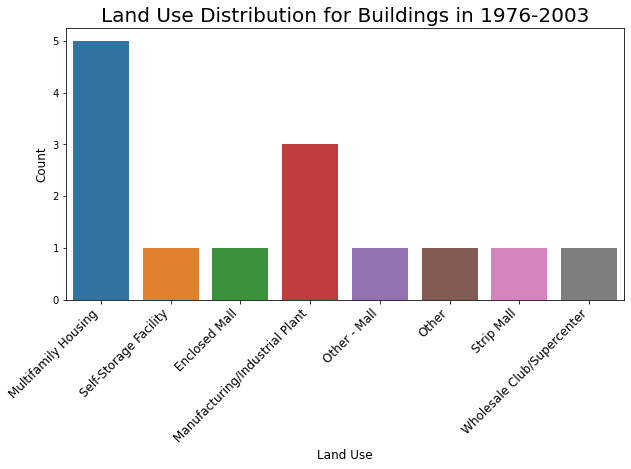

In [44]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use Distribution for Buildings in 1976-2003', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

d_1976_2003 = all_data_filtered[all_data_filtered['Average_Age']=='1976-2003']

ax = sns.countplot(x='PrimPropTypCalc', data=d_1976_2003)

plt.xlabel('Land Use', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Count', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

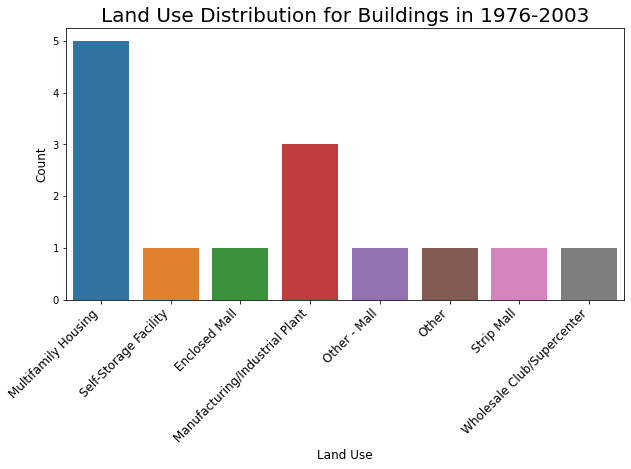

In [45]:
# Write your code here.
plt.figure(figsize = (10,5))
plt.title('Land Use Distribution for Buildings in 1976-2003', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

d_1976_2003 = all_data_filtered[all_data_filtered['Average_Age']=='1976-2003']

ax = sns.countplot(x='PrimPropTypCalc', data=d_1976_2003)

plt.xlabel('Land Use', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Count', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

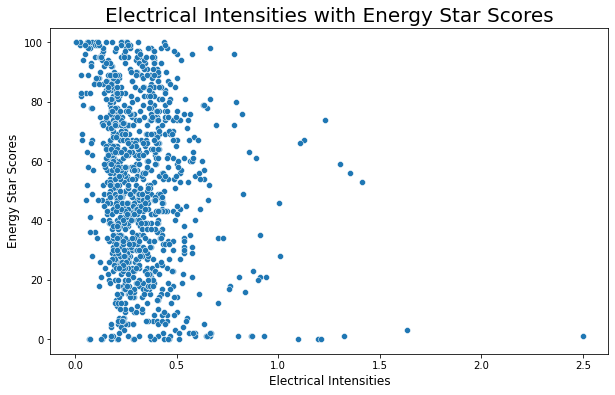

In [46]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Electrical Intensities with Energy Star Scores', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

drop_751_411 = all_data_filtered.drop(index=[751, 411]) 

ax = sns.scatterplot(x='WN_Sit_Elc_Int1', y='Ener_Star_Score', data=drop_751_411)

plt.xlabel('Electrical Intensities', fontsize = 12)
plt.ylabel('Energy Star Scores', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

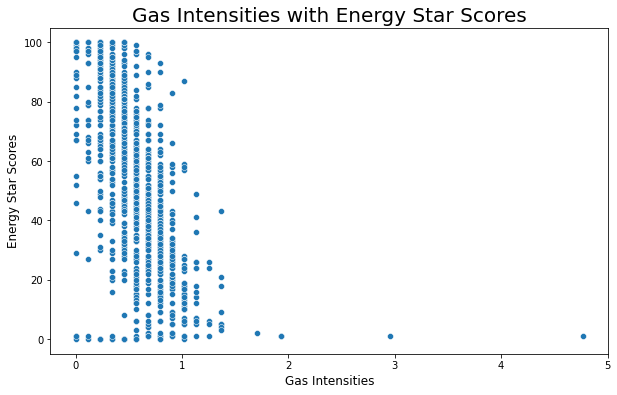

In [47]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Gas Intensities with Energy Star Scores', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='WN_Sit_Gas_Int1', y='Ener_Star_Score', data=all_data_filtered)

plt.xlabel('Gas Intensities', fontsize = 12)
plt.ylabel('Energy Star Scores', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

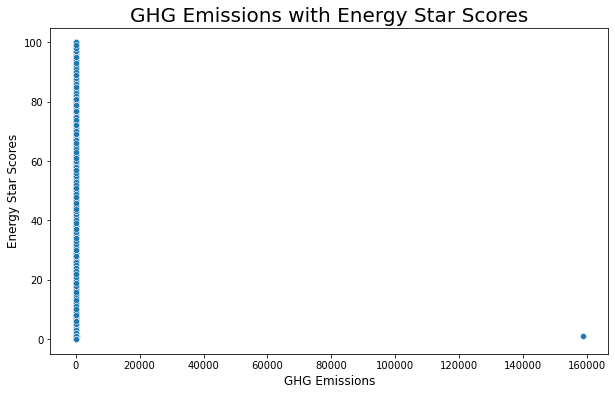

In [48]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('GHG Emissions with Energy Star Scores', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.scatterplot(x='GHG_Emiss_Int1', y='Ener_Star_Score', data=all_data_filtered)

plt.xlabel('GHG Emissions', fontsize = 12)
plt.ylabel('Energy Star Scores', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

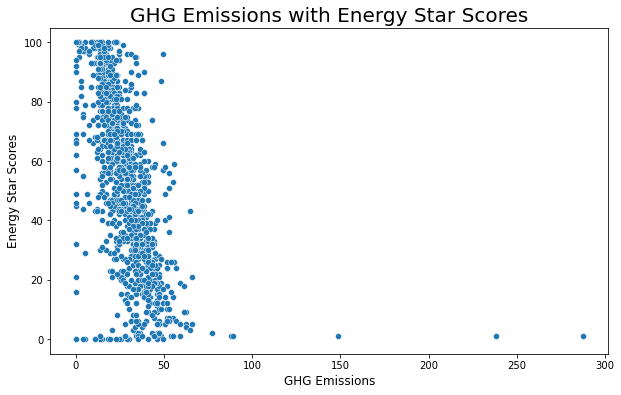

In [49]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('GHG Emissions with Energy Star Scores', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

drop_411 = all_data_filtered.drop(index=411)

ax = sns.scatterplot(x='GHG_Emiss_Int1', y='Ener_Star_Score', data=drop_411)

plt.xlabel('GHG Emissions', fontsize = 12)
plt.ylabel('Energy Star Scores', fontsize = 12)

plt.show

/Users/steffanylung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

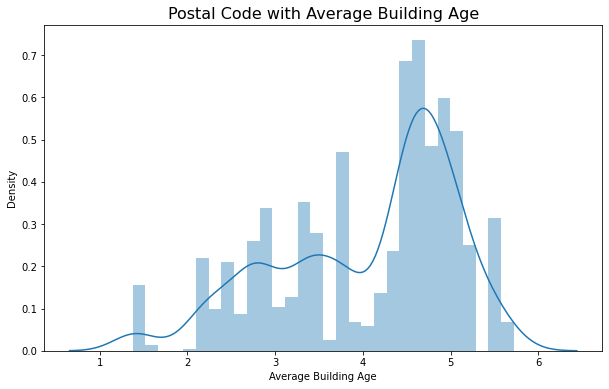

In [50]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Postal Code with Average Building Age', fontsize = 16) #title is added to canvas so do it here, not the lineplot itself

ax = sns.distplot(x=all_data_filtered['Average_Age_int'], bins=30)

plt.xlabel('Average Building Age')
plt.ylabel('Density')

plt.show

## Analysis by District

<function matplotlib.pyplot.show(close=None, block=None)>

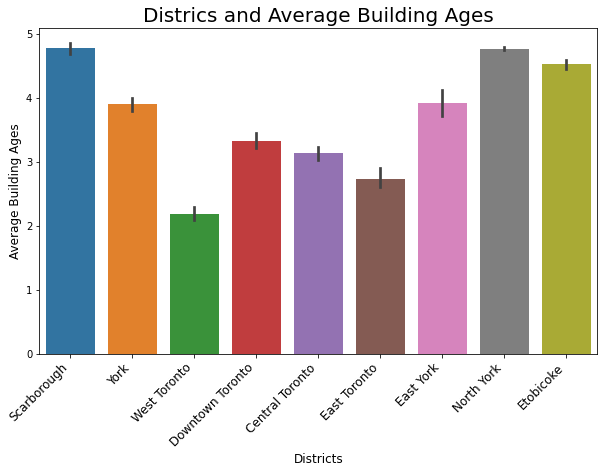

In [51]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Districs and Average Building Ages', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='District', y='Average_Age_int', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Districts', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Average Building Ages', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

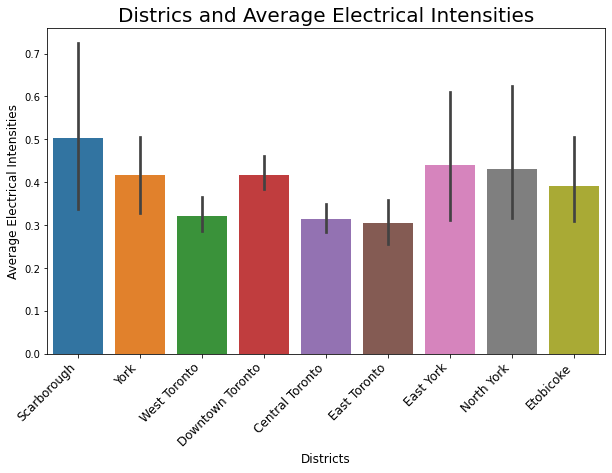

In [52]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Districs and Average Electrical Intensities', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='District', y='WN_Sit_Elc_Int1', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Districts', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Average Electrical Intensities', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

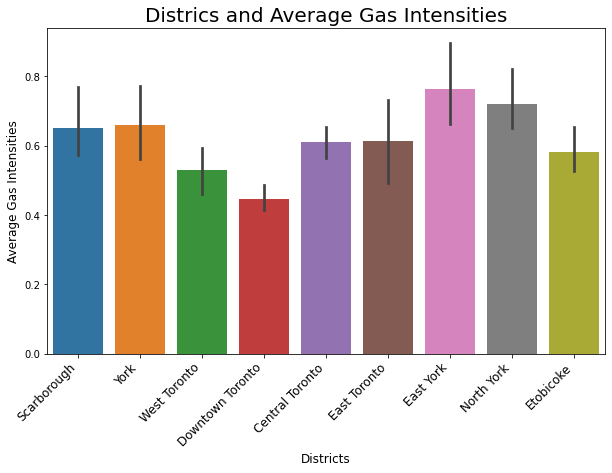

In [53]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Districs and Average Gas Intensities', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='District', y='WN_Sit_Gas_Int1', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Districts', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Average Gas Intensities', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

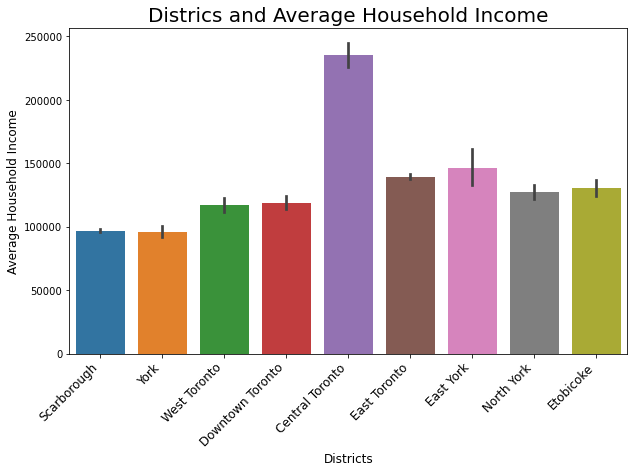

In [54]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Districs and Average Household Income', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='District', y='Average_Household_Income', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Districts', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Average Household Income', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

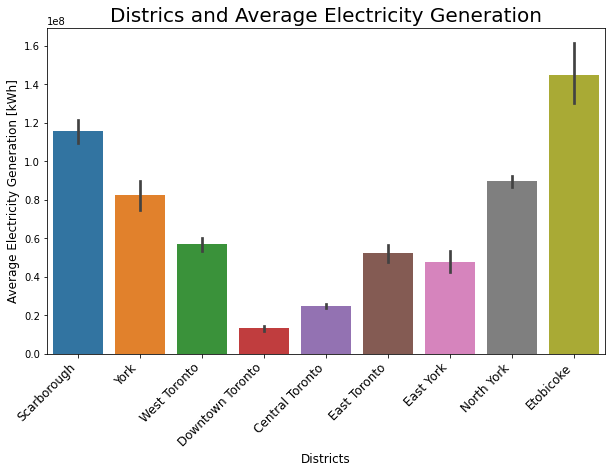

In [55]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Districs and Average Electricity Generation', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='District', y='Annual_electricity_generation_k', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Districts', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Average Electricity Generation [kWh]', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

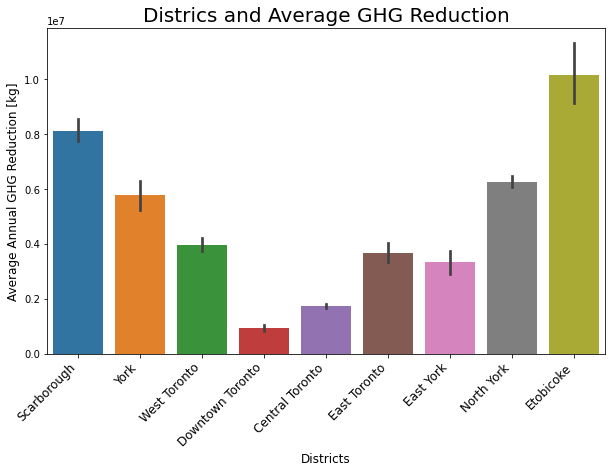

In [56]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Districs and Average GHG Reduction', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='District', y='Annual_ghg_reduction_kg', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Districts', fontsize = 12)
plt.xticks(fontsize = 12, rotation=45, ha='right')
plt.ylabel('Average Annual GHG Reduction [kg]', fontsize = 12)

plt.show

## Household Income Analysis

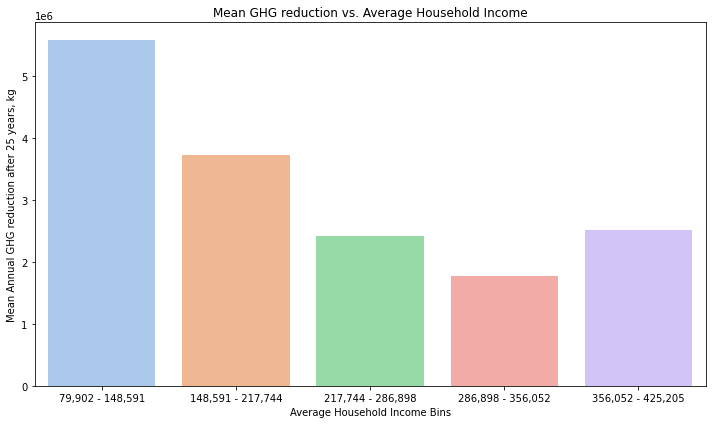

In [57]:
# Define the bins and labels
num_bins = 5
bin_labels = ['79,902 - 148,591', '148,591 - 217,744', '217,744 - 286,898', '286,898 - 356,052', '356,052 - 425,205']
bins = [79902, 148591, 217744, 286898, 356052, 425205]  # Define bin edges
pastel_palette = sns.color_palette("pastel")

# Create bins with custom labels for 'Average_Household_Income'
all_data_filtered['Income_Bins'] = pd.cut(all_data_filtered['Average_Household_Income'], bins=bins, labels=bin_labels)

# Group by 'Income_Bins' and find the mean of 'Annual_energy_generation_GJ/m^2'
grouped_data = all_data_filtered.groupby('Income_Bins')['Annual_ghg_reduction_kg'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Bins', y='Annual_ghg_reduction_kg', data=grouped_data, palette=pastel_palette)
plt.xlabel('Average Household Income Bins')
plt.ylabel('Mean Annual GHG reduction after 25 years, kg')
plt.title('Mean GHG reduction vs. Average Household Income')
plt.tight_layout()
plt.show()

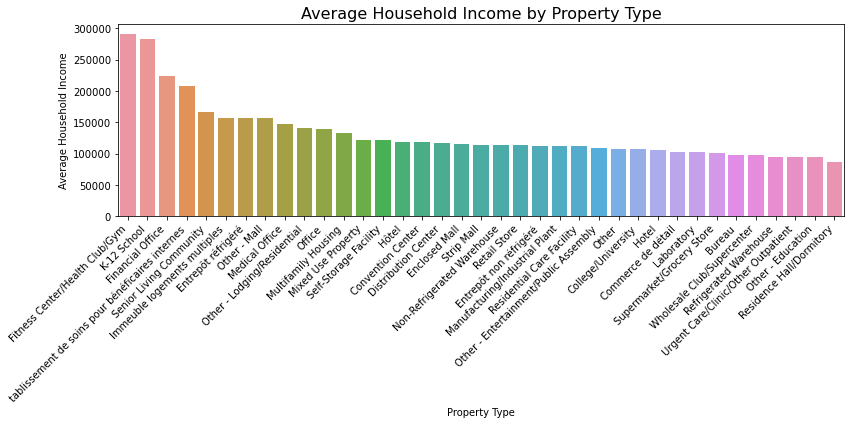

In [58]:
plt.figure(figsize=(12, 6))
plt.title('Average Household Income by Property Type', fontsize=16)

# Calculate the mean of 'Average_Household_Income' for each 'PrimPropTypCalc'
grouped_data = all_data_filtered.groupby('PrimPropTypCalc')['Average_Household_Income'].mean().reset_index()

# Sort the data by 'Average Household Income' in descending order
sorted_data = grouped_data.sort_values(by='Average_Household_Income', ascending=False)

# Use the sorted data for the bar plot
ax = sns.barplot(x='PrimPropTypCalc', y='Average_Household_Income', data=sorted_data, order=sorted_data['PrimPropTypCalc'])

plt.xlabel('Property Type')
plt.ylabel('Average Household Income')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


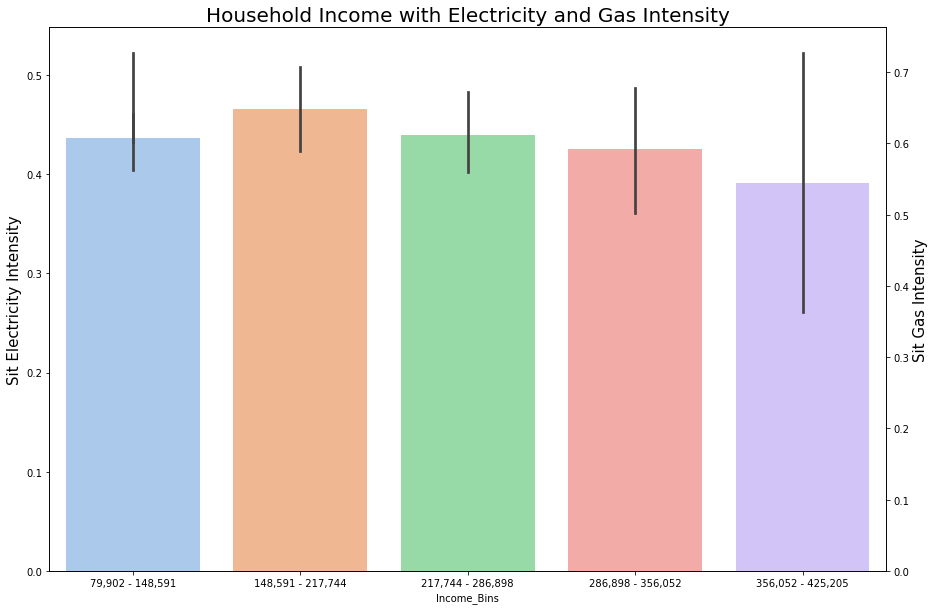

In [59]:
plt.figure(figsize=(15, 10))
plt.title('Household Income with Electricity and Gas Intensity', fontsize=20)

ax1 = sns.barplot(x='Income_Bins', y='WN_Sit_Elc_Int1', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)
ax2 = ax1.twinx()
ax2 = sns.barplot(x='Income_Bins', y='WN_Sit_Gas_Int1', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)

ax1.set_ylabel('Sit Electricity Intensity', fontsize=15)
ax2.set_ylabel('Sit Gas Intensity', fontsize=15)

plt.xlabel('Average Household Income', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels())

# Adjust the tick parameters
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labelsize=25)

plt.show()


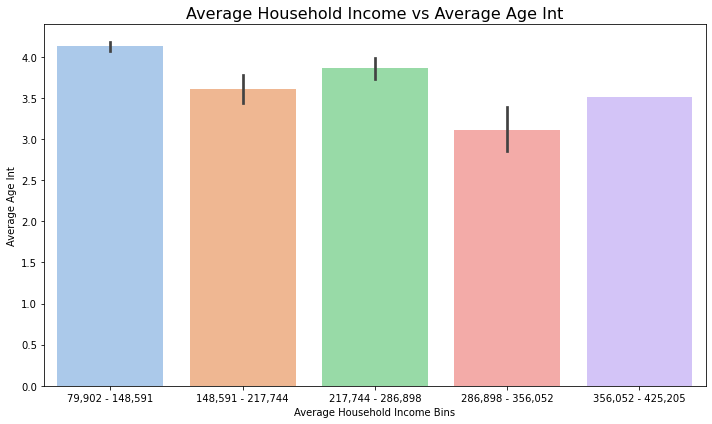

In [60]:
plt.figure(figsize=(10, 6))
plt.title('Average Household Income vs Average Age Int', fontsize=16)

sns.barplot(x='Income_Bins', y='Average_Age_int', data=all_data_filtered, palette=pastel_palette, order=bin_labels, estimator=np.mean)

plt.xlabel('Average Household Income Bins')
plt.ylabel('Average Age Int')

plt.tight_layout()
plt.show()

## Potential for Electrical and Energy Generation (Solar Potential)

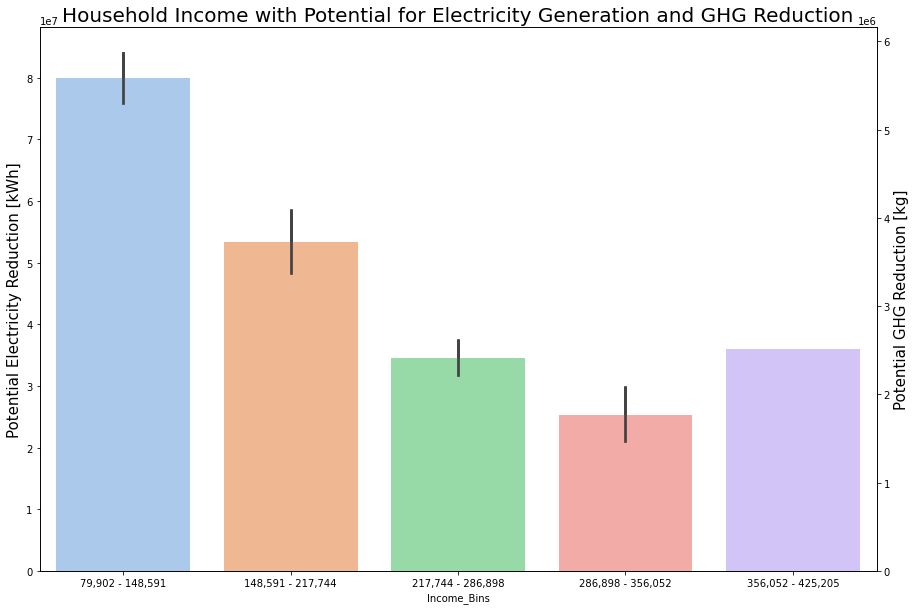

In [61]:
plt.figure(figsize=(15, 10))
plt.title('Household Income with Potential for Electricity Generation and GHG Reduction', fontsize=20)

ax1 = sns.barplot(x='Income_Bins', y='Annual_electricity_generation_k', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)
ax2 = ax1.twinx()
ax2 = sns.barplot(x='Income_Bins', y='Annual_ghg_reduction_kg', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)

ax1.set_ylabel('Potential Electricity Reduction [kWh]', fontsize=15)
ax2.set_ylabel('Potential GHG Reduction [kg]', fontsize=15)

plt.xlabel('Average Household Income Bins', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels())

plt.show()


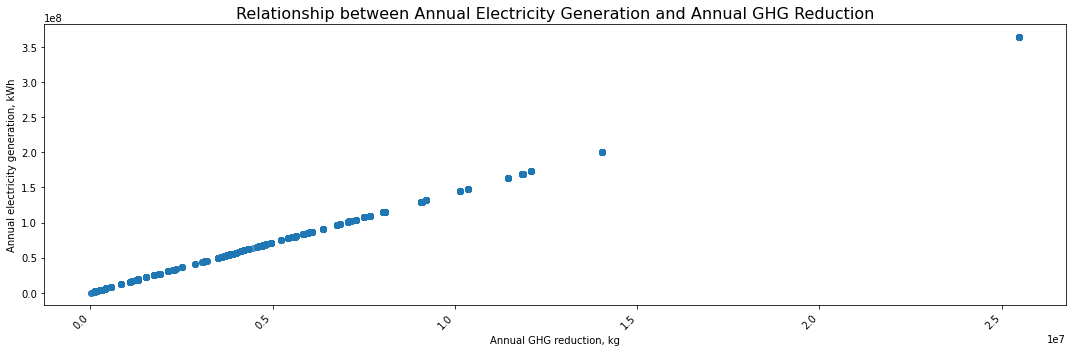

In [62]:
plt.figure(figsize=(15, 5))
plt.title('Relationship between Annual Electricity Generation and Annual GHG Reduction', fontsize=16)

plt.scatter(all_data_filtered['Annual_ghg_reduction_kg'], all_data_filtered['Annual_electricity_generation_k'], alpha=0.7)
plt.xlabel('Annual GHG reduction, kg')
plt.ylabel('Annual electricity generation, kWh')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [63]:
top_30_rows = all_data_filtered.nlargest(30, 'Annual_electricity_generation_k')
top_3_common = top_30_rows['PrimPropTypCalc'].value_counts().nlargest(3).index.tolist()
print("Three most common values in top 30:", top_3_common)

Three most common values in top 30: ['Other', 'Office', 'Multifamily Housing']


In [64]:
bottom_30_rows = all_data_filtered.nsmallest(30, 'Annual_electricity_generation_k')
top_3_common = top_30_rows['PrimPropTypCalc'].value_counts().nsmallest(3).index.tolist()
print("Three most common values in bottom 30:", top_3_common)

Three most common values in bottom 30: ['Laboratory', 'Entrepôt non réfrigéré', 'Other - Entertainment/Public Assembly']
